## Global variables

You must manually set two variables:
- `save_dir`: Where the figures will be saved
- `figures_data_dir`: The absolute path to `idp-design/figures/data/`

In [1]:
from datetime import date
from pathlib import Path

save_dir = '/path/to/output/directory/' # FIXME (keep the trailing "/"!)
assert(Path(save_dir)).exists()

figures_data_dir = '/path/to/idp-design/figures/data/' # FIXME (keep the trailing "/"!)
assert(Path(figures_data_dir)).exists()

## Libraries

In [2]:
import matplotlib
mpl = matplotlib

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['figure.figsize'] = (6.0,4.0) # default = (6.0, 4.0)
mpl.rcParams['font.size']      = 12       # default = 10

mpl.rcParams['axes.linewidth']    = 0.75 # default = 1.0
mpl.rcParams['lines.linewidth']   = 1.5 # default = 1.0
mpl.rcParams['patch.linewidth']   = 1.0 # default = 1.0
mpl.rcParams['grid.linewidth']    = 0.5 # default = 0.5
mpl.rcParams['xtick.major.width'] = 1.0 # default = 0.5
mpl.rcParams['xtick.minor.width'] = 0.0 # default = 0.5
mpl.rcParams['ytick.major.width'] = 1.0 # default = 0.5
mpl.rcParams['ytick.minor.width'] = 0.0 # default = 0.5

def make_nice_axis(ax):
    """ Function to beautify axis"""
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_tick_params(pad=10,top='on',direction='in')
    ax.yaxis.set_tick_params(pad=10,top='on',direction='in')
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Arial')
import pandas as pd
import os
def save_figure(fig, fig_file):
    """
    Save the given figure object as PDF and PNG formats.

    Parameters:
    fig (matplotlib.figure.Figure): The figure object to be saved.
    fig_file (str): The file path (including the file name without extension) where the figure will be saved.

    Returns:
    None
    """
    os.makedirs(os.path.dirname(fig_file), exist_ok=True)
    fig.savefig(fname=fig_file + ".pdf", dpi=300, format='pdf',bbox_inches='tight')
    fig.savefig(fname=fig_file + ".png", dpi=1200, format='png')

In [3]:
# Define a dictionary of colors for the amino acids with slightly different shades
aa_colors = {
    # Blue residues
    'R': '#0000FF',  # Arginine (blue)
    'H': '#1E90FF',  # Histidine (dodger blue)
    'K': '#4169E1',  # Lysine (royal blue)

    # Red residues
    'D': '#FF0000',  # Aspartic acid (red)
    'E': '#FF6347',  # Glutamic acid (tomato)

    # Purple residues
    'N': '#FF1493',  # Asparagine (thistle)
    'Q': '#FFB6C1',  # Glutamine (medium purple)

    # Black-grey residues
    'I': '#333333',  # Isoleucine (dark grey)
    'L': '#666666',  # Leucine (grey)
    'P': '#999999',  # Proline (light grey)
    'V': '#000000',  # Valine (black)
    'M': '#4D4D4D',  # Methionine (medium grey)
    'A': '#2F4F4F',  # Alanine (dark slate grey)

    # Green residues
    'C': '#00FF00',  # Cysteine (lime)
    'S': '#66FF66',  # Serine (light green)
    'T': '#99FF99',  # Threonine (pale green)
    'G': '#32CD32',  # Glycine (lime green)

    # Brown residues
    'F': '#A52A2A',  # Phenylalanine (brown)
    'W': '#8B4513',  # Tryptophan (saddle brown)
    'Y': '#5D3A1A',  # Tyrosine (dark brown)
}

cb_colors_dark = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
cb_colors_pastel = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5']

# Replotting jax-idp figures

## Figure 2

#### Convergence/entropy plots

In [4]:
path_to_fig2b_data = figures_data_dir + 'fig2/rg20_opt/fig2b.csv'
fig2b_data = pd.read_csv(path_to_fig2b_data)

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig2b/rg


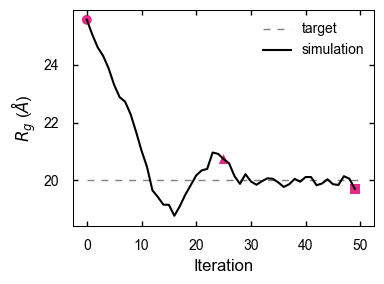

In [5]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
make_nice_axis(ax)
# ax.scatter(range(50),fig2b_data['rg'],s=10,c='grey',alpha=.75, edgecolors='none')

ax.hlines(20.0,0,50,linestyles=(0,(5,5)),color='grey',label='target',lw=1.0)
ax.plot(fig2b_data['rg'],c='k',label='simulation')

ax.scatter(range(50)[0],fig2b_data['rg'][0],s=50,c=cb_colors_dark[3],alpha=1.0, edgecolors='none',marker='o')
ax.scatter(range(50)[49],fig2b_data['rg'][49],s=50,c=cb_colors_dark[3],alpha=1.0, edgecolors='none',marker='s')
ax.scatter(range(50)[25],fig2b_data['rg'][25],s=50,c=cb_colors_dark[3],alpha=1.0, edgecolors='none',marker='^')

ax.set_xlabel('Iteration')
ax.set_ylabel('$R_g$ ($\\AA$)')
ax.legend(bbox_to_anchor=(1.01,1),frameon=False,fontsize=10)
plt.tight_layout()
fig_save = True
fig_name = 'fig2b/rg'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig2b/rg_alba


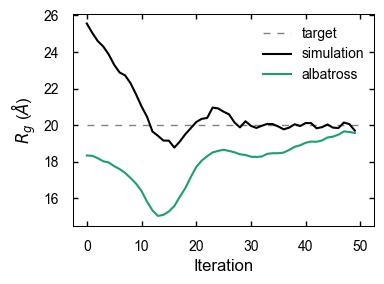

In [6]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
make_nice_axis(ax)
ax.hlines(20.0,0,50,linestyles=(0,(5,5)),color='grey',label='target',lw=1.0)
ax.plot(fig2b_data['rg'],c='k',label='simulation')
ax.plot(fig2b_data['alba_rg'],c=cb_colors_dark[0],label='albatross')
ax.set_xlabel('Iteration')
ax.set_ylabel('$R_g$ ($\\AA$)')
ax.legend(bbox_to_anchor=(1.01,1),frameon=False,fontsize=10)
plt.tight_layout()
fig_save = True
fig_name = 'fig2b/rg_alba'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

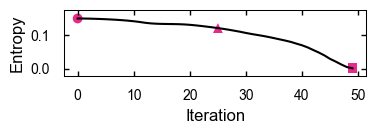

In [7]:
fig, ax = plt.subplots(1,1,figsize=(4,1.5))
make_nice_axis(ax)
ax.plot(fig2b_data['entropy'],c='k')
ax.scatter(range(50)[0],fig2b_data['entropy'][0],s=50,c=cb_colors_dark[3],alpha=1.0, edgecolors='none',marker='o')
ax.scatter(range(50)[49],fig2b_data['entropy'][49],s=50,c=cb_colors_dark[3],alpha=1.0, edgecolors='none',marker='s')
ax.scatter(range(50)[25],fig2b_data['entropy'][25],s=50,c=cb_colors_dark[3],alpha=1.0, edgecolors='none',marker='^')

ax.set_xlabel('Iteration')
ax.set_ylabel('Entropy')
ax.set_ylim(-0.02,0.175)
plt.tight_layout()
fig_save = False
fig_name = 'fig2b/entropy'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

#### Sequence iteration 

In [8]:
import logomaker

In [9]:
pseq_0 = figures_data_dir + 'fig2/rg20_opt/pseq/pseq_i0.npy'
pseq_25 = figures_data_dir + 'fig2/rg20_opt/pseq/pseq_i25.npy'
pseq_49 = figures_data_dir + 'fig2/rg20_opt/pseq/pseq_i49.npy'

residues = [x for x in 'MGKTRADEYVLQWFSHNPCI']
seq_0 = pd.DataFrame(np.load(pseq_0),columns=residues)
seq_25 = pd.DataFrame(np.load(pseq_25),columns=residues)
seq_49 = pd.DataFrame(np.load(pseq_49),columns=residues)

aa_order = list('RHKDEAILPVMNQTGSCYWF')
seq_0_rearranged = seq_0[aa_order]
seq_25_rearranged = seq_25[aa_order]
seq_49_rearranged = seq_49[aa_order]

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig2b/seqlogos


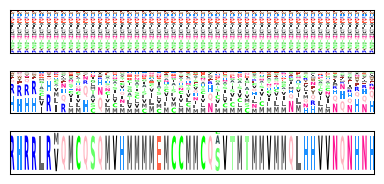

In [10]:
fig, ax = plt.subplots(3,1,figsize=(4,2))
for axis in ax:
    make_nice_axis(axis)
logomaker.Logo(seq_0_rearranged,ax=ax[0],color_scheme=aa_colors, vpad=.2, width=.6,stack_order='small_on_top')
logomaker.Logo(seq_25_rearranged,ax=ax[1],color_scheme=aa_colors, vpad=.2, width=.6,stack_order='small_on_top')
logomaker.Logo(seq_49_rearranged,ax=ax[2],color_scheme=aa_colors, vpad=.2, width=.6,stack_order='small_on_top')
iters = [0,25,49]

for axis in ax:
    # axis.set_xlim(-1,50)
    axis.set_xticks([])  # Remove x-axis ticks
    axis.set_xlabel('')  # Remove x-axis labels
    axis.set_yticks([])  # Remove x-axis ticks
    axis.set_ylabel('')  # Remove x-axis labels    # axis.set_title('Iteration {}'.format(iters[ax.tolist().index(axis)]),fontsize=10)
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust hspace to control vertical spacing

plt.tight_layout()
fig_save = True
fig_name = 'fig2b/seqlogos'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

#### Plot compositional fraction plots

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig2b/seqlogos_composition


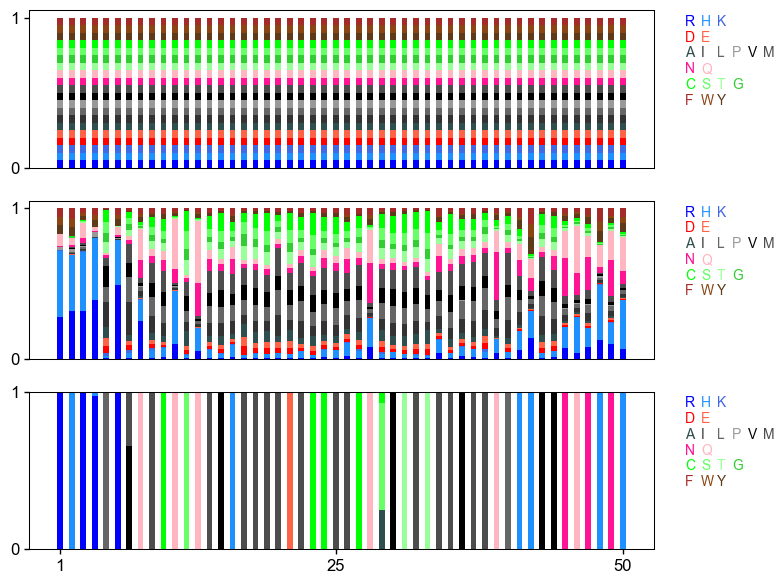

In [11]:
# Colors for each AA (20 colors)
colors = [aa_colors[aa] for aa in seq_0_rearranged.columns.values]


# Define the groups of residues by color
blue_residues = 'R/H/K'
red_residues = 'D/E'
black_grey_residues = 'A/I/L/P/V/M'
purple_residues = 'N/Q'
green_residues = 'C/S/T/G'
brown_residues = 'F/W/Y'

# Create the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(8, 6))

# List of sequences
sequences = [seq_0_rearranged, seq_25_rearranged, seq_49_rearranged]

# Plot each sequence as a stacked bar
for ax, seq in zip(axs, sequences):
    bottom = np.zeros(seq.shape[0])
    for i in range(seq.shape[1]):
        ax.bar(np.arange(1,seq.shape[0]+1), seq.values[:, i], width=0.5, color=colors[i], bottom=bottom, align='center')
        bottom += seq.values[:, i]
    ax.set_yticks([0,1])  # Remove y-axis ticks
for ax in axs[:-1]:
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_xlabel('')  # Remove x-axis labels

for ax in axs[-1:]:
    ax.set_xticks([1,25,50])
# Add text annotations for the groups of residues
y_positions = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4]
residue_groups = [blue_residues, red_residues, black_grey_residues,purple_residues, green_residues, brown_residues]

for ax in axs:
    for y_pos, residues in zip(y_positions, residue_groups):
        x_pos = 1.05
        for residue in residues.split('/'):
            ax.text(x_pos, y_pos, residue, transform=ax.transAxes, fontsize=10, color=aa_colors[residue])
            x_pos += 0.025  # Adjust spacing between residues

# Adjust layout and show the plot
plt.tight_layout()

fig_save = True
fig_name = 'fig2b/seqlogos_composition'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()


### Range of Ree/Rgs

#### mpipi-comparison

In [12]:
path_to_fig3a_data = figures_data_dir +  'fig3/rg_checks.csv'
path_to_fig3a_data_ree = figures_data_dir + 'fig3/ree_checks.csv'
fig3a_data = pd.read_csv(path_to_fig3a_data)
fig3a_data['percentages'] = 100* (fig3a_data['calc_rgs'].values - fig3a_data['target'].values)/(fig3a_data['target'].values)
n50_values = fig3a_data[fig3a_data['n']==50].values
n50_values = n50_values[np.argsort(n50_values[:,1])][:-2,:]
n75_values = fig3a_data[fig3a_data['n']==75].values
n75_values = n75_values[np.argsort(n75_values[:,1])][:-2,:]

fig3a_data_ree = pd.read_csv(path_to_fig3a_data_ree)
fig3a_data_ree['percentages'] = 100* (fig3a_data_ree['calc_rees'].values - fig3a_data_ree['target'].values)/(fig3a_data_ree['target'].values)
n50_values_ree = fig3a_data_ree[fig3a_data_ree['n']==50].values
n50_values_ree = n50_values_ree[np.argsort(n50_values_ree[:,1])][2:,:]
n75_values_ree = fig3a_data_ree[fig3a_data_ree['n']==75].values
n75_values_ree = n75_values_ree[np.argsort(n75_values_ree[:,1])][2:,:]

/tmp/ipykernel_104823/3902075006.py:14: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axis[0].scatter(n75_values[:,1]/scale_75,n75_values[:,2]/scale_75,s=25,c='grey', edgecolors='none',label='n=75',marker='x')
/tmp/ipykernel_104823/3902075006.py:18: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axis[1].scatter(n75_values_ree[:,1]/scale_75,n75_values_ree[:,2]/scale_75,s=25,c='grey', edgecolors='none',label='n=75',marker='x')


/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig3a/rg_ree_mpipi_preds_2panels


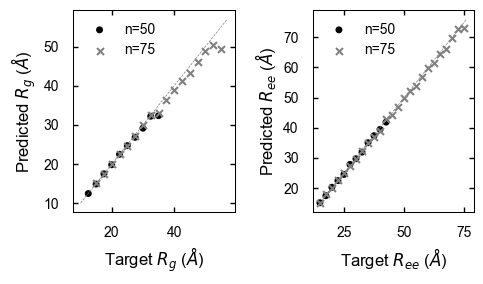

In [13]:
scale = False
scale_50 = np.sqrt(50)*3.81
scale_75 = np.sqrt(75)*3.81


if not scale:
    scale_50 = 1
    scale_75 = 1
fig, axis = plt.subplots(1,2,figsize=(5,3))
for ax in axis:
    make_nice_axis(ax) 

axis[0].scatter(n50_values[:,1]/scale_50,n50_values[:,2]/scale_50,s=25,c='k', edgecolors='none',label='n=50')
axis[0].scatter(n75_values[:,1]/scale_75,n75_values[:,2]/scale_75,s=25,c='grey', edgecolors='none',label='n=75',marker='x')
axis[0].plot(np.arange(10,58),np.arange(10,58),c='grey',ls='--',lw=0.5)

axis[1].scatter(n50_values_ree[:,1]/scale_50,n50_values_ree[:,2]/scale_50,s=25,c='k', edgecolors='none',label='n=50')
axis[1].scatter(n75_values_ree[:,1]/scale_75,n75_values_ree[:,2]/scale_75,s=25,c='grey', edgecolors='none',label='n=75',marker='x')
axis[1].plot(np.arange(15,77),np.arange(15,77),c='grey',ls='--',lw=0.5)

axis[0].set_xlabel('Target $R_g$ ($\\AA$)')
axis[0].set_ylabel('Predicted $R_g$ ($\\AA$)')

axis[1].set_xlabel('Target $R_{ee}$ ($\\AA$)')
axis[1].set_ylabel('Predicted $R_{ee}$ ($\\AA$)')
axis[0].legend(frameon=False,fontsize=10)
axis[1].legend(frameon=False,fontsize=10)
plt.tight_layout()
fig_save = True
fig_name = 'fig3a/rg_ree_mpipi_preds_2panels'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

#### HPS-comparison

In [14]:
path_to_fig3a_data = figures_data_dir + 'fig3/rg_checks_hps.csv'
path_to_fig3a_data_ree = figures_data_dir + 'fig3/ree_checks_hps.csv'
fig3a_data = pd.read_csv(path_to_fig3a_data)
fig3a_data['percentages'] = 100* (fig3a_data['calc_rgs'].values - fig3a_data['target'].values)/(fig3a_data['target'].values)
n50_values = fig3a_data[fig3a_data['n']==50].values
n50_values = n50_values[np.argsort(n50_values[:,1])][2:-4,:]
n75_values = fig3a_data[fig3a_data['n']==75].values
n75_values = n75_values[np.argsort(n75_values[:,1])][:-1,:]

fig3a_data_ree = pd.read_csv(path_to_fig3a_data_ree)
fig3a_data_ree['percentages'] = 100* (fig3a_data_ree['calc_rees'].values - fig3a_data_ree['target'].values)/(fig3a_data_ree['target'].values)
n50_values_ree = fig3a_data_ree[fig3a_data_ree['n']==50].values
n50_values_ree = n50_values_ree[np.argsort(n50_values_ree[:,1])][3:,:][::2]
n75_values_ree = fig3a_data_ree[fig3a_data_ree['n']==75].values
n75_values_ree = n75_values_ree[np.argsort(n75_values_ree[:,1])][3:,:][::2]

/tmp/ipykernel_104823/3251910048.py:14: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axis[0].scatter(n75_values[:,1]/scale_75,n75_values[:,2]/scale_75,s=25,c='grey', edgecolors='none',label='n=75',marker='x')
/tmp/ipykernel_104823/3251910048.py:18: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axis[1].scatter(n75_values_ree[:,1]/scale_75,n75_values_ree[:,2]/scale_75,s=25,c='grey', edgecolors='none',label='n=75',marker='x')


/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig3a/rg_ree_hps_preds_2panels


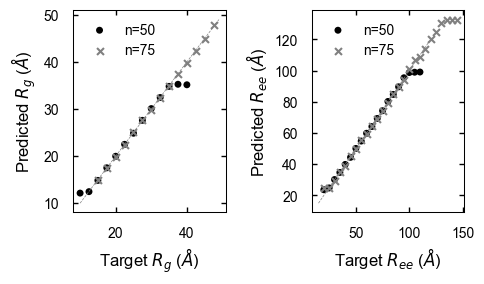

In [15]:
scale = False
scale_50 = np.sqrt(50)*3.81
scale_75 = np.sqrt(75)*3.81


if not scale:
    scale_50 = 1
    scale_75 = 1
fig, axis = plt.subplots(1,2,figsize=(5,3))
for ax in axis:
    make_nice_axis(ax) 

axis[0].scatter(n50_values[:,1]/scale_50,n50_values[:,2]/scale_50,s=25,c='k', edgecolors='none',label='n=50')
axis[0].scatter(n75_values[:,1]/scale_75,n75_values[:,2]/scale_75,s=25,c='grey', edgecolors='none',label='n=75',marker='x')
axis[0].plot(np.arange(10,50),np.arange(10,50),c='grey',ls='--',lw=0.5)

axis[1].scatter(n50_values_ree[:,1]/scale_50,n50_values_ree[:,2]/scale_50,s=25,c='k', edgecolors='none',label='n=50')
axis[1].scatter(n75_values_ree[:,1]/scale_75,n75_values_ree[:,2]/scale_75,s=25,c='grey', edgecolors='none',label='n=75',marker='x')
axis[1].plot(np.arange(15,120),np.arange(15,120),c='grey',ls='--',lw=0.5)

axis[0].set_xlabel('Target $R_g$ ($\\AA$)')
axis[0].set_ylabel('Predicted $R_g$ ($\\AA$)')

axis[1].set_xlabel('Target $R_{ee}$ ($\\AA$)')
axis[1].set_ylabel('Predicted $R_{ee}$ ($\\AA$)')
axis[0].legend(frameon=False,fontsize=10)
axis[1].legend(frameon=False,fontsize=10)
plt.tight_layout()
fig_save = True
fig_name = 'fig3a/rg_ree_hps_preds_2panels'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

#### ALBA disagree

In [16]:
path_to_fig_3a_alba= figures_data_dir + 'fig3/alba-disagree/n50-rg32.5/plotting_data.csv'
fig3a_alba = pd.read_csv(path_to_fig_3a_alba)

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig3a/rg_alba_disagree


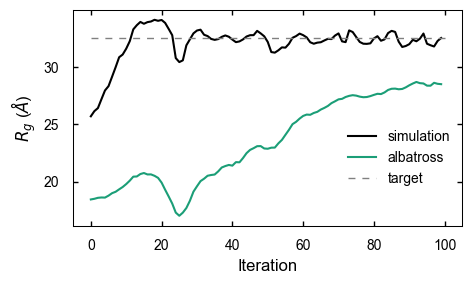

In [17]:
fig, ax = plt.subplots(1,1,figsize=(5,3))
make_nice_axis(ax)
ax.plot(fig3a_alba['iter'],fig3a_alba['rg'],c='k',label='simulation')
ax.plot(fig3a_alba['iter'],fig3a_alba['alba_rg'],c=cb_colors_dark[0],label='albatross')
ax.hlines(32.5,0,100,linestyles=(0,(5,5)),color='grey',label='target',lw=1.0)
ax.set_xlabel('Iteration')
ax.set_ylabel('$R_g$ ($\\AA$)')
ax.legend(bbox_to_anchor=(1,0.5),frameon=False,fontsize=10)
plt.tight_layout()
fig_save = True
fig_name = 'fig3a/rg_alba_disagree'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

## Figure 3

### Loop solutions

In [18]:
path_to_fig3_loop_mutations =  figures_data_dir + 'fig3/loop/mutations/mutation_data.csv'
fig3_loop_mutations = pd.read_csv(path_to_fig3_loop_mutations)
conditions = ['WT','P>A','R>A','W>A','Y>A','WY>A','W>Y','Y>W']

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig3c/loop_mutations


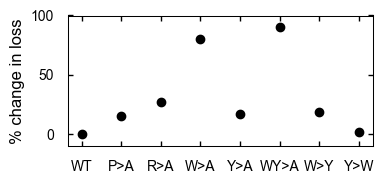

In [19]:
fig, ax = plt.subplots(1,1,figsize=(4,2))
make_nice_axis(ax)
# ax.scatter(n50_values[:,1],n50_values[:,2],s=25,c=cb_colors_dark[0], edgecolors='none',label='n=50')
ax.scatter(conditions,fig3_loop_mutations.values[:,-1],c='k')
# ax.set_xlabel('Target $R_g$ ($\\AA$)')
ax.set_ylim((-10,100))
ax.set_ylabel('% change in loss')
# ax.legend(frameon=False,fontsize=10)
plt.tight_layout()
fig_save = True
fig_name = 'fig3c/loop_mutations'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

### Linker solutions

In [20]:
path_to_fig3_linker_mutations = figures_data_dir + 'fig3/linker/mutations/mutation_data.csv'
fig3_linker_mutations = pd.read_csv(path_to_fig3_linker_mutations)
conditions = ['WT','K>A','N>A','P>A','R>A','K>R','R>K']

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig3c/linker_mutations


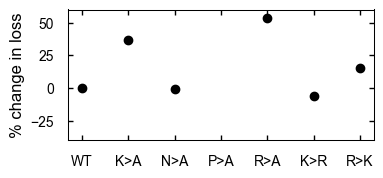

In [21]:
fig, ax = plt.subplots(1,1,figsize=(4,2))
make_nice_axis(ax)
# ax.scatter(n50_values[:,1],n50_values[:,2],s=25,c=cb_colors_dark[0], edgecolors='none',label='n=50')
ax.scatter(conditions,fig3_linker_mutations.values[:,-1],c='k')
# ax.set_xlabel('Target $R_g$ ($\\AA$)')
ax.set_ylim((-40,60))
ax.set_ylabel('% change in loss')
# ax.legend(frameon=False,fontsize=10)
plt.tight_layout()
fig_save = True
fig_name = 'fig3c/linker_mutations'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

### Loop/linker contact frequencies

In [22]:
file_fig_loop_contact = figures_data_dir + 'fig3/loop/contact_map_distances.npy'
fig3_loop_contacts =np.load(file_fig_loop_contact)
fig3_ideal_normalization = np.zeros_like(fig3_loop_contacts)
for i in range(fig3_loop_contacts.shape[0]):
    for j in range(fig3_loop_contacts.shape[1]):
            fig3_ideal_normalization[i, j] = 3.81*np.abs(i - j) ** 0.5
            fig3_ideal_normalization[j, i] = 3.81*np.abs(i - j) ** 0.5


/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig3c/loop_contact_frequency_normalized


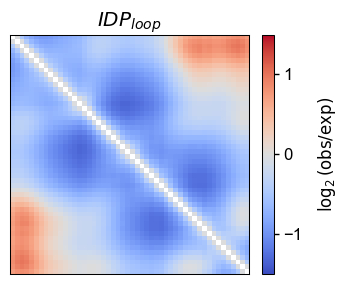

In [23]:
sequence = 'WWWYYFLLIIIIRRRERPPRRPRRRRRPRRRPRRPPRWWHWHHHHHFYWW'

fig, ax = plt.subplots(1,1,figsize=(4,3))
make_nice_axis(ax)
f = ax.imshow(np.log2(fig3_ideal_normalization/fig3_loop_contacts),cmap='coolwarm',vmin=-1.5,vmax=1.5)
cbar2= fig.colorbar(f,ax=ax,fraction=0.046, pad=0.04)
cbar2.set_ticks([-1, 0, 1])  # Set colorbar ticks
ax.set_title('$IDP_{loop}$')  # Add title to the second plot

cbar2.set_label(r'$\log_2(\mathrm{obs/exp})$', labelpad=10)


# Remove the default tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
# Remove the tick marks
ax.tick_params(axis='both', which='both', length=0)


plt.tight_layout()
fig_save = True
fig_name = 'fig3c/loop_contact_frequency_normalized'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

In [24]:
file_fig_linker_contact = figures_data_dir + 'fig3/linker/contact_map_distances.npy'
fig3_linker_contacts =np.load(file_fig_linker_contact)
fig3_ideal_normalization = np.zeros_like(fig3_linker_contacts)
for i in range(fig3_linker_contacts.shape[0]):
    for j in range(fig3_linker_contacts.shape[1]):
            fig3_ideal_normalization[i, j] = 3.81*np.abs(i - j) ** 0.5
            fig3_ideal_normalization[j, i] = 3.81*np.abs(i - j) ** 0.5


/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig3c/linker_contact_frequency_normalized


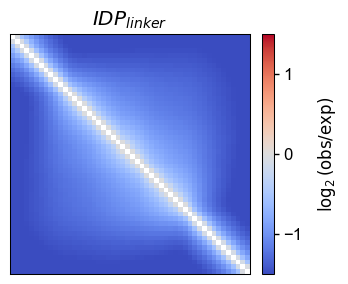

In [25]:
sequence = 'RRPRRPPRRPPRRRKKKKKKKKGKGGKNKKKGKGKKRRPPRRPPRRPPRR'

fig, ax = plt.subplots(1,1,figsize=(4,3))
make_nice_axis(ax)
f = ax.imshow(np.log2(fig3_ideal_normalization/fig3_linker_contacts),cmap='coolwarm',vmin=-1.5,vmax=1.5)
cbar2= fig.colorbar(f,ax=ax,fraction=0.046, pad=0.04)
cbar2.set_ticks([-1, 0, 1])  # Set colorbar ticks
ax.set_title('$IDP_{linker}$')  # Add title to the second plot

cbar2.set_label(r'$\log_2(\mathrm{obs/exp})$', labelpad=10)


# Remove the default tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
# Remove the tick marks
ax.tick_params(axis='both', which='both', length=0)


plt.tight_layout()
fig_save = True
fig_name = 'fig3c/linker_contact_frequency_normalized'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

### Example Arc-plot style visualization of loop interaction frequecies

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig3c/loop_enriched_contacts_1.5


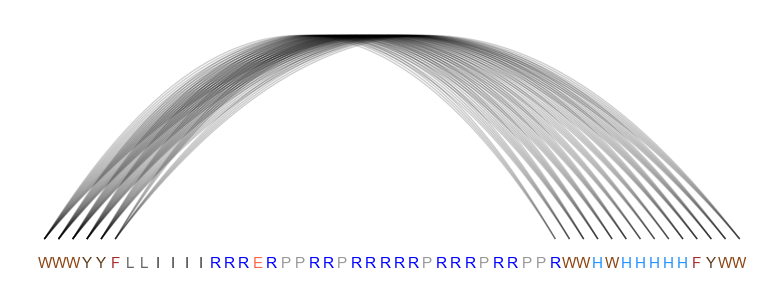

In [26]:
# Example data
sequence = 'WWWYYFLLIIIIRRRERPPRRPRRRRRPRRRPRRPPRWWHWHHHHHFYWW'

L = 50  # Length of the vector
vector = np.arange(L)
contacts =fig3_ideal_normalization/fig3_loop_contacts  # Random contact frequencies for demonstration
contacts = np.nan_to_num(contacts,nan=1.0)
# Create the figure and axis
fig, ax = plt.subplots(figsize=(8,3))

# Plot the vector as letters
for i in range(L):
    ax.text(i+1, 0, sequence[i], fontsize=11, color=aa_colors[sequence[i]], ha='center', va='center')


thresh = 1.5

# Draw parabolic arcs for contact frequencies
for i in range(L):
    for j in range(i + 1, L):
        if contacts[i, j] >= thresh:  # Threshold for drawing arcs
            x = np.linspace(i, j, 100)
            y = 0.4*(x - i) * (j - x) / ((j - i) / 2) ** 2  # Parabolic shape
            ax.plot(x+1, y+0.05, color='black', alpha=0.25*contacts[i, j]/ np.max(contacts), linewidth=1)

# Set labels and title
ax.set_ylim((-0.02,0.5))

# Hide y-axis
ax.get_yaxis().set_visible(False)

# Remove x-ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])

# Remove the bounding plot box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.tight_layout()
fig_save = True
fig_name = 'fig3c/loop_enriched_contacts_{}'.format(thresh)
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
# Show the plot
plt.show()

### Plot the loss function

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig3c/linker_loop_loss_text


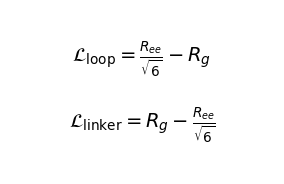

In [27]:
fig, ax = plt.subplots(1,1,figsize=(3,2))
make_nice_axis(ax)
# Define the text with LaTeX formatting
text1 = r'$\mathcal{L}_{\text{loop}} = \frac{R_{ee}}{\sqrt{6}} - R_g$'
text2 = r'$\mathcal{L}_{\text{linker}} = R_g - \frac{R_{ee}}{\sqrt{6}}$'

# Plot the text on the figure
ax.text(0.5, 0.7, text1, fontsize=14, ha='center', va='center')
ax.text(0.5, 0.3, text2, fontsize=14, ha='center', va='center')

# Remove axes
ax.axis('off')

plt.tight_layout()
fig_save = True
fig_name = 'fig3c/linker_loop_loss_text'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

## Figure 4

### Constraining disorder

### disordered constraint

In [28]:
file_fig4_overparam = figures_data_dir +  'fig4/n50-rg12.5-0.2-0.8/plot_data.csv'
data_fig4_overparam = pd.read_csv(file_fig4_overparam)

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig4/rg_overparam


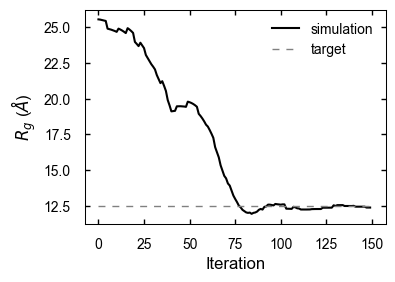

In [29]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
make_nice_axis(ax)
ax.plot(data_fig4_overparam['iter'],data_fig4_overparam['rg'],c='k',label='simulation')
# ax.scatter(data_fig4_overparam['iter'],data_fig4_overparam['rg'],s=10,c='grey',alpha=.75, edgecolors='none')
ax.hlines(12.5,0,150,linestyles=(0,(5,5)),color='grey',label='target',lw=1.0)
ax.set_xlabel('Iteration')
ax.set_ylabel('$R_g$ ($\\AA$)')
ax.legend(bbox_to_anchor=(1,1),frameon=False,fontsize=10)
plt.tight_layout()
fig_save = True
fig_name = 'fig4/rg_overparam'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig4/disorder_overparam


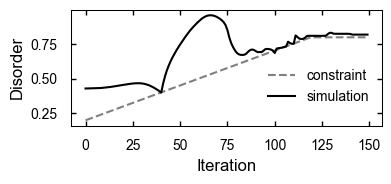

In [30]:
fig, ax = plt.subplots(1,1,figsize=(4,2))
make_nice_axis(ax)
ax.plot(data_fig4_overparam['iter'],data_fig4_overparam['min_disorder'],c='grey',ls='--',label='constraint')
ax.plot(data_fig4_overparam['iter'],data_fig4_overparam['disorder'],c='k',label='simulation')
ax.set_xlabel('Iteration')
ax.set_ylabel('Disorder')
ax.legend(bbox_to_anchor=(1,0.6),frameon=False,fontsize=10)
plt.tight_layout()
fig_save = True
fig_name = 'fig4/disorder_overparam'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

### constraind vs unconstrained

In [31]:
file_fig4_mp_rg = figures_data_dir + 'fig4/mp_checks.csv'
data_fig4_mp_rg = pd.read_csv(file_fig4_mp_rg)

file_fig4_op_rg = figures_data_dir +  'fig4/overparam_checks.csv'
data_fig4_op_rg = pd.read_csv(file_fig4_op_rg)

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig4/disorder_mp_vs_op


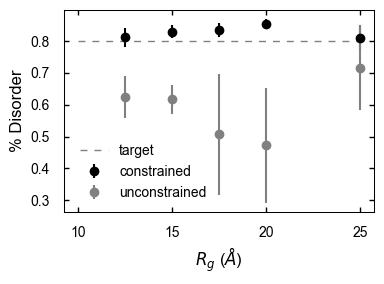

In [32]:
targets = [12.5,15.0,17.5,20,25]
fig,ax = plt.subplots(1,1,figsize=(4,3))
make_nice_axis(ax)
for target in targets[0:1]:
    ax.errorbar(target,data_fig4_mp_rg[data_fig4_mp_rg['target']==target]['disorder'].mean(),yerr=data_fig4_mp_rg[data_fig4_mp_rg['target']==target]['disorder'].std(),fmt='o',color='k',label='constrained')
    ax.errorbar(target,data_fig4_op_rg[data_fig4_op_rg['target']==target]['disorder'].mean(),yerr=data_fig4_op_rg[data_fig4_op_rg['target']==target]['disorder'].std(),fmt='o',color='grey',label='unconstrained')

for target in targets[1:]:
    ax.errorbar(target,data_fig4_mp_rg[data_fig4_mp_rg['target']==target]['disorder'].mean(),yerr=data_fig4_mp_rg[data_fig4_mp_rg['target']==target]['disorder'].std(),fmt='o',color='k')
    ax.errorbar(target,data_fig4_op_rg[data_fig4_op_rg['target']==target]['disorder'].mean(),yerr=data_fig4_op_rg[data_fig4_op_rg['target']==target]['disorder'].std(),fmt='o',color='grey')

ax.hlines(0.8,10,25,linestyles=(0,(5,5)),color='grey',label='target',lw=1.0)

ax.legend(bbox_to_anchor=(0.5,0.4),frameon=False,fontsize=10)
ax.set_ylabel('% Disorder')
ax.set_xlabel('$R_g$ ($\\AA$)')
ax.set_xticks([10,15,20,25])
plt.tight_layout()
fig_save = True
fig_name = 'fig4/disorder_mp_vs_op'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

### charge constrained notebook

In [33]:
file_fig4_cc_rg = figures_data_dir + 'fig4/charge-constrained/rg17.5/plot_data.csv'
data_fig4_cc_rg = pd.read_csv(file_fig4_cc_rg)

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig4/cc_rg


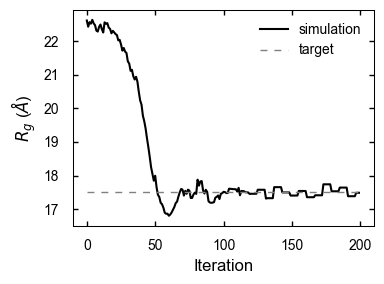

In [34]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
make_nice_axis(ax)
ax.plot(data_fig4_cc_rg['iter'],data_fig4_cc_rg['rg'],c='k',label='simulation')
ax.hlines(17.5,0,200,linestyles=(0,(5,5)),color='grey',label='target',lw=1.0)
ax.set_xlabel('Iteration')
ax.set_ylabel('$R_g$ ($\\AA$)')
ax.legend(bbox_to_anchor=(1,1),frameon=False,fontsize=10)
plt.tight_layout()
fig_save = True
fig_name = 'fig4/cc_rg'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig4/cc_charge_ratios


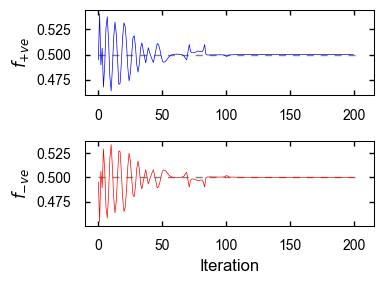

In [35]:
fig, ax = plt.subplots(2,1,figsize=(4,3))
make_nice_axis(ax[0])
make_nice_axis(ax[1])

ax[0].hlines(0.5,0,205,linestyles=(0,(5,5)),color='grey',label='target constraint',lw=1.0)
ax[0].plot(data_fig4_cc_rg['iter'],data_fig4_cc_rg['pos_charge_ratio'],c='blue' ,label='+ve charge ratio',lw=0.5)
ax[1].hlines(0.5,0,205,linestyles=(0,(5,5)),color='grey',label='target constraint',lw=1.0)

ax[1].plot(data_fig4_cc_rg['iter'],data_fig4_cc_rg['neg_charge_ratio'],c='red',label='-ve charge ratio',lw=0.5)

ax[1].set_xlabel('Iteration')
ax[0].set_ylabel('$f_{+ve}$')
ax[1].set_ylabel('$f_{-ve}$')

# ax.legend(bbox_to_anchor=(0.4,0.55),frameon=False,fontsize=10)
plt.tight_layout()
fig_save = True
fig_name = 'fig4/cc_charge_ratios'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

#### kappa vs rg

### To be included

## Figure 5

### Sensor design text for loss

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig5a/sensor_tests


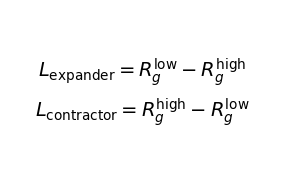

In [36]:
fig, ax = plt.subplots(1,1,figsize=(3,2))
make_nice_axis(ax)

# Define the text with LaTeX formatting
text1 = r'$L_{\text{expander}} = R_{g}^{\text{low}} - R_{g}^{\text{high}}$'
text2 = r'$L_{\text{contractor}} = R_{g}^{\text{high}} - R_{g}^{\text{low}}$'

# Plot the text on the figure
ax.text(0.5, 0.62, text1, fontsize=14, ha='center', va='center')
ax.text(0.5, 0.38, text2, fontsize=14, ha='center', va='center')

# Remove axes
ax.axis('off')

plt.tight_layout()
fig_save = True
fig_name = 'fig5a/sensor_tests'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

### Salt contractor

In [37]:
file_fig_salt_contractor_low= figures_data_dir + 'fig5/contractor/lo/contact_map_distances.npy'
file_fig_salt_contractor_high= figures_data_dir + 'fig5/contractor/hi/contact_map_distances.npy'
fig5_contractor_low =np.load(file_fig_salt_contractor_low)
fig5_contractor_high =np.load(file_fig_salt_contractor_high)
fig5_ideal_normalization = np.zeros_like(fig5_contractor_low)
for i in range(fig5_contractor_low.shape[0]):
    for j in range(fig5_contractor_low.shape[1]):
            fig5_ideal_normalization[i, j] = 3.81*np.abs(i - j) ** 0.5
            fig5_ideal_normalization[j, i] = 3.81*np.abs(i - j) ** 0.5


/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig5a/sensor_tests_contractor


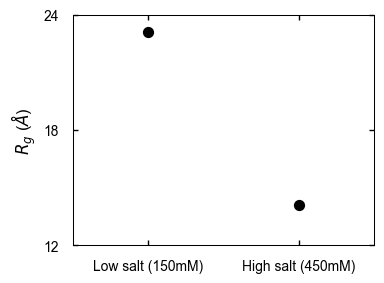

In [38]:
fig,ax =plt.subplots(1,1,figsize=(4,3))
make_nice_axis(ax)
Rg_low = 23.1
Rg_high = 14.1
salt_low = 150
salt_high = 450

ax.scatter(0,Rg_low,s=50,c='k',label='low salt')
ax.scatter(1,Rg_high,s=50,c='k',label='high salt')
ax.set_xticks([0,1])
ax.set_xlim(-0.5,1.5)
ax.set_ylim(12,24)
ax.set_yticks([12,18,24])
ax.set_xticklabels(['Low salt (150mM)','High salt (450mM)'])

ax.set_ylabel('$R_g$ ($\\AA$)')
plt.tight_layout()
fig_save = True
fig_name = 'fig5a/sensor_tests_contractor'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

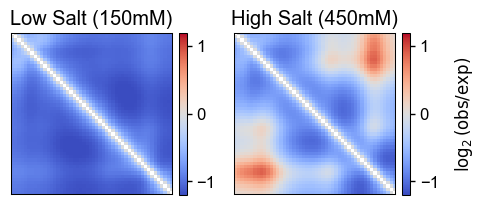

In [39]:
sequence = 'MHHHHHHWYYWRWRRRRRRRRRRRRRRRWRWRRRRRRRRRRWWWWRRRRR'

fig, ax = plt.subplots(1,2,figsize=(5,3))
for axis in ax:
    make_nice_axis(axis)

f = ax[0].imshow(np.log2(fig5_ideal_normalization/fig5_contractor_low),cmap='coolwarm',vmin=-1.2,vmax=1.2)
cbar1 = fig.colorbar(f,ax=ax[0],fraction=0.046, pad=0.04)
cbar1.set_ticks([-1, 0, 1])  # Set colorbar ticks
ax[0].set_title('Low Salt (150mM)')  # Add title to the first plot

f = ax[1].imshow(np.log2(fig5_ideal_normalization/fig5_contractor_high),cmap='coolwarm',vmin=-1.2,vmax=1.2)
cbar2= fig.colorbar(f,ax=ax[1],fraction=0.046, pad=0.04)
cbar2.set_ticks([-1, 0, 1])  # Set colorbar ticks
ax[1].set_title('High Salt (450mM)')  # Add title to the second plot

# Set colorbar title
# cbar1.set_label(r'$\log_2(\mathrm{obs/exp})$', labelpad=10)
cbar2.set_label(r'$\log_2(\mathrm{obs/exp})$', labelpad=10)


    # ax[1].text(i, -1, aa, fontsize=12, color=aa_colors[aa], ha='center', va='center')


# Remove the default tick labels
for axis in ax:
    axis.set_xticklabels([])
    axis.set_yticklabels([])
    # Remove the tick marks
    axis.tick_params(axis='both', which='both', length=0)


plt.tight_layout()
fig_save = False
fig_name = 'fig5/salt_contractors_low_high'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig5/salt_contractors_sequence


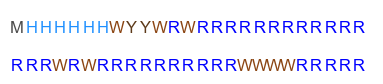

In [40]:
# Create a new figure for the sequence text
fig, ax = plt.subplots(1, 1, figsize=(4, 1))

# Plot the sequence as text with colors
for i, aa in enumerate(sequence[:25]):
    ax.text(i, 0, aa, fontsize=12, color=aa_colors[aa], ha='center', va='center')

for i, aa in enumerate(sequence[25:]):
    ax.text(i, -0.05, aa, fontsize=12, color=aa_colors[aa], ha='center', va='center')

ax.set_ylim(-0.05, 0.025)
ax.set_xlim(-0.5, len(sequence)/2)
# Remove axes
ax.axis('off')
plt.tight_layout()
fig_save = True
fig_name = 'fig5/salt_contractors_sequence'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)


plt.show()

### Salt Expander

In [41]:
file_fig_salt_expander_low= figures_data_dir + 'fig5/expander/lo/contact_map_distances.npy'
file_fig_salt_expander_high= figures_data_dir + 'fig5/expander/hi/contact_map_distances.npy'
fig5_expander_low =np.load(file_fig_salt_expander_low)
fig5_expander_high =np.load(file_fig_salt_expander_high)
fig5_ideal_normalization = np.zeros_like(fig5_expander_low)
for i in range(fig5_expander_low.shape[0]):
    for j in range(fig5_expander_low.shape[1]):
            fig5_ideal_normalization[i, j] = 3.81*np.abs(i - j) ** 0.5
            fig5_ideal_normalization[j, i] = 3.81*np.abs(i - j) ** 0.5


/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig5a/sensor_tests_expander


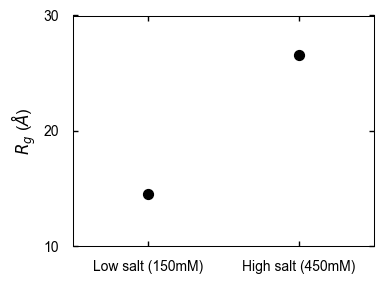

In [42]:
fig,ax =plt.subplots(1,1,figsize=(4,3))
make_nice_axis(ax)
Rg_low = 14.5
Rg_high = 26.6
salt_low = 150
salt_high = 450

ax.scatter(0,Rg_low,s=50,c='k',label='low salt')
ax.scatter(1,Rg_high,s=50,c='k',label='high salt')
ax.set_xticks([0,1])
ax.set_xlim(-0.5,1.5)
ax.set_ylim(10,30)
ax.set_yticks([10,20,30])
ax.set_xticklabels(['Low salt (150mM)','High salt (450mM)'])

ax.set_ylabel('$R_g$ ($\\AA$)')
plt.tight_layout()
fig_save = True
fig_name = 'fig5a/sensor_tests_expander'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig5/salt_expanders_low_high


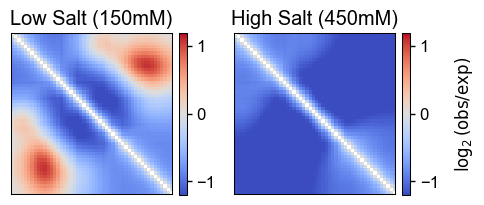

In [43]:
sequence = 'MHHHHHHKKRKRKRRPRRPPWPPWWPPWWWPPPEEEEDDDDDDDEDEDDD'

fig, ax = plt.subplots(1,2,figsize=(5,3))
for axis in ax:
    make_nice_axis(axis)

f = ax[0].imshow(np.log2(fig5_ideal_normalization/fig5_expander_low),cmap='coolwarm',vmin=-1.2,vmax=1.2)
cbar1 = fig.colorbar(f,ax=ax[0],fraction=0.046, pad=0.04)
cbar1.set_ticks([-1, 0, 1])  # Set colorbar ticks
ax[0].set_title('Low Salt (150mM)')  # Add title to the first plot

f = ax[1].imshow(np.log2(fig5_ideal_normalization/fig5_expander_high),cmap='coolwarm',vmin=-1.2,vmax=1.2)
cbar2= fig.colorbar(f,ax=ax[1],fraction=0.046, pad=0.04)
cbar2.set_ticks([-1, 0, 1])  # Set colorbar ticks
ax[1].set_title('High Salt (450mM)')  # Add title to the second plot

# Set colorbar title
# cbar1.set_label(r'$\log_2(\mathrm{obs/exp})$', labelpad=10)
cbar2.set_label(r'$\log_2(\mathrm{obs/exp})$', labelpad=10)

# Remove the default tick labels
for axis in ax:
    axis.set_xticklabels([])
    axis.set_yticklabels([])
    # Remove the tick marks
    axis.tick_params(axis='both', which='both', length=0)


plt.tight_layout()
fig_save = True
fig_name = 'fig5/salt_expanders_low_high'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)
plt.show()

/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig5/salt_expanders_sequence


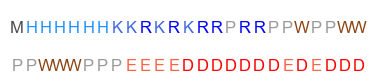

In [44]:
sequence = 'MHHHHHHKKRKRKRRPRRPPWPPWWPPWWWPPPEEEEDDDDDDDEDEDDD'

# Create a new figure for the sequence text
fig, ax = plt.subplots(1, 1, figsize=(4, 1))

# Plot the sequence as text with colors
for i, aa in enumerate(sequence[:25]):
    ax.text(i, 0, aa, fontsize=12, color=aa_colors[aa], ha='center', va='center')

for i, aa in enumerate(sequence[25:]):
    ax.text(i, -0.05, aa, fontsize=12, color=aa_colors[aa], ha='center', va='center')

ax.set_ylim(-0.05, 0.025)
ax.set_xlim(-0.5, len(sequence)/2)
# Remove axes
ax.axis('off')
plt.tight_layout()
fig_save = True
fig_name = 'fig5/salt_expanders_sequence'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(fig, fig_file=save_dir+fig_name)


plt.show()

## Figure 6

### Binding distance plot

In [45]:
file_fig6_fus = figures_data_dir +  'fig6/fuslc/opt/log/loss.txt'
data_fig6_fus = pd.read_csv(file_fig6_fus,sep=' ',header=None)


/home/ryan/Documents/harvard/research/idp-design/figures/test-output/fig6/fuslc_binder


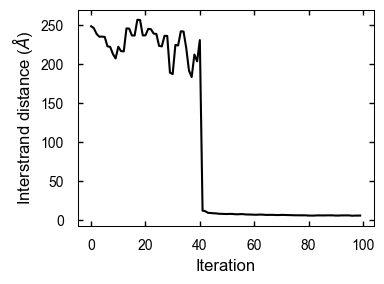

In [46]:
f,ax = plt.subplots(1,1,figsize=(4,3))
make_nice_axis(ax)
ax.plot(data_fig6_fus.index.values,data_fig6_fus.values,c='k')
ax.set_xlabel('Iteration')
ax.set_ylabel('Interstrand distance ($\\AA$)')
plt.tight_layout()
fig_save = True
fig_name = 'fig6/fuslc_binder'
if fig_save:
    print(save_dir +  fig_name)
    save_figure(f, fig_file=save_dir+fig_name)
plt.show()